In [1]:
from trainer import *
import torchvision
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

transform = transforms.Compose([
        transforms.ToTensor(),
        # transforms.Normalize((0.5,), (0.5,)),
        # transforms.RandomAffine(20, translate=(0.20,0.20))
    ])

# I changed these numbers many times to verify that my method of selecting the classes was correct
allowed_classes = [1, 3, 7]
labels_map = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

train_dataset = torchvision.datasets.FashionMNIST('.', train=True, download=True, transform=transform)
train_dataset_allowed_list = [(train_dataset[i][0], 
                               allowed_classes.index(train_dataset[i][1])) 
                               for i in range(len(train_dataset)) if train_dataset[i][1] in allowed_classes]
train_data = Custom_MNIST_Dataset(train_dataset_allowed_list)


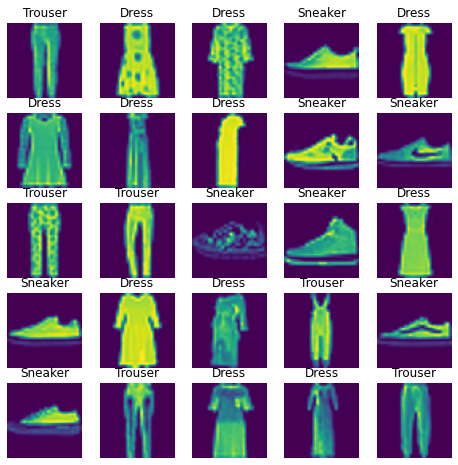

In [3]:
transform = transforms.ToPILImage()
figure = plt.figure(figsize=(8, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    label = allowed_classes[label]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(transform(img).resize((56,56)))
    # print(img.shape)
# plt.savefig('results/DataVisualization3.png')
plt.show()

In [4]:
# I changed these numbers many times to verify that my method of selecting the classes was correct
allowed_classes = [1, 3, 7, 8]
labels_map = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9'
}

transform = transforms.Compose([
        transforms.ToTensor(),
        # transforms.Normalize((0.5,), (0.5,)),
        # transforms.RandomAffine(20, translate=(0.20,0.20))
    ])

train_dataset = torchvision.datasets.MNIST('.', train=True, download=False, transform=transform)
train_dataset_allowed_list = [(train_dataset[i][0], 
                               allowed_classes.index(train_dataset[i][1])) 
                               for i in range(len(train_dataset)) if train_dataset[i][1] in allowed_classes]
train_data = Custom_MNIST_Dataset(train_dataset_allowed_list)

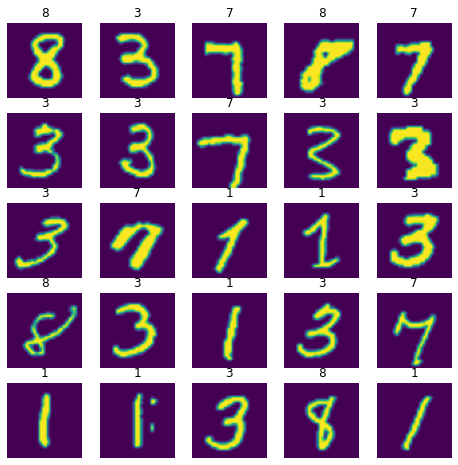

In [6]:
transform = transforms.ToPILImage()
figure = plt.figure(figsize=(8, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    label = allowed_classes[label]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(transform(img).resize((56,56)))
    # print(img.shape)
# plt.savefig('results/DataVisualization3.png')
plt.show()

In [ ]:
#Moving random 180 test images from MNIST to labelme dir for annotations

import torchvision
from torchvision import transforms
from PIL import Image
import random

category_choice = 3
category_dict_map = {
    0: 'cyberbullying',
    1: 'self_harm',
    2: 'nsfw',
    3: 'MNIST_71',
    4: 'MNIST_94',
    5: 'MNIST_80',
    6: 'MNIST_61',
    7: 'MNIST_sneaker_sandal',
    8: 'MNIST_shirt_t-shirt',
    9: 'MNIST_pullover_shirt',
    10: 'MNIST_boot_sneaker'
}

labelme_path = '/workspace/adv_robustness/region_explainability/labelme'
image_dir_path = os.path.join(labelme_path, category_dict_map[category_choice], 'test_images/')
results_dir_path = os.path.join(labelme_path, category_dict_map[category_choice], 'BASS_output/')

allowed_classes = [7]
labels_map = {
    0: 'T-shirt/top', # or 0 for MNIST
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot' # or 9 for MNIST
}

transform = transforms.Compose([
        transforms.ToTensor()
    ])

test_dataset = torchvision.datasets.MNIST('.', train=False, transform=transform, download=False)
test_dataset_allowed_list = [test_dataset[i][0]
                             for i in range(len(test_dataset)) if test_dataset[i][1] in allowed_classes]

transform = transforms.ToPILImage()
random.seed(42)
test_dataset_allowed_list = random.sample(test_dataset_allowed_list, k=180)

for i, data in enumerate(test_dataset_allowed_list):
    img = transform(data)
    img.save(os.path.join(image_dir_path, f'seven_{i}.png'))